<h1><center>Programming for Data Analysis</center></h1>
<h3><center>Autumn/Winter 2021 Project</center></h3>

---

<br>

<h1><center>"The Session"</center></h1>

![symbol](images/symbols.jpeg)

<br>

___
#### Introduction  

The brief for the project stipulated that we *"create a data set by simulating a real-world phenomenon"*. It was further suggested we pick something that is of interest to us in our personal or professional life. I've decided to do something on music sessions and try to simulate a dataset based on the attendees at sessions in a given month in a particular pub in Cork city! 

I'll try to work out all of the variables, examine their properties, potential data types, and how they relate to each other. I'll then try and work out code to simulate a random dataset based on that information. 

![session1](images/session1.jpg)

<br>

#### The variables

The first challenge was to come up with a lost of variables, that were both appropriate and possible to simulate. The list below changed quite a few times after I discovered problems with some, and thought of others as the project progressed. A field trip helped! 😁

1. The players  
There can be anywhere between 3 and sometimes more than 10 musicians on any given night, and this particular pub (pre-covid!) would usually have 7 sessions a week. So that's a monthly range of between 84 and 280+ musicians. The brief asks for "at least one-hundred data points across at least four different variables", so I need to ensure my simulation returns at least that.
3 is always the minimum number of musicians each night, as they would be the paid hosts of the session. The norm would be around 5 or 6 musicians, but sometimes there might be more than 10 for a party or special occasion.

2. The instruments  
The range of instruments played includes fiddle, accordion, guitar, flute, uilleann pipes, bodhrán, bouzouki, banjo, concertina, mandolin, bass, and drums. Some of the instruments are particualar to a musical genre, while some would be found at all of the different sessions. Within that some instruments are more popular than others, with at least 1 guitar being found at every single session.

3. Genre  
While the pub mostly has Irish traditional music (ITM), there are also sessions of bluegrass, old-time, and blues music. The weekly breakdown of sessions is 4 ITM and 1 each of the other three.

4. Ability  
All of the musicians would be of differing ability levels. The hosts would normally be the most able. The guests can range from beginners just joining in, to experienced professional musicians passing through town. The pub in question is quite famous so there would be a lot more highly competent players than beginners. 

5. Age  
The pub in question is over 21s only and is regarded as an 'old man's pub'! The total age range would be from 21 up to 80 I'd say, which would be equally spread out I think with possible spikes at either end of the spectrum. Age isn't necessarily connected to ability but can be! Generally the blugrass players tend to be older, while a lot of the ITM players would be younger.

6. Paid  
The session would always have at least 3 hosts who would be paid. It's most common for these to be the best ability-wise, biggest repertoire, and older (but not always!). The typical instruments for ITM hosts would be accordion, fiddle and guitar. Whereas there may be more of a mix in the other genres, and more musicians sharing the fee.

7. Gender  
Men would certainly be in the majority at all sessions here! Blues and bluegrass sessions would nearly be entirely male, while there would be more women in the ITM sessions.

8. Drink  
Just putting this in for the craic! The typical drinks might be Beamish, Guinness, Murphys, various lagers on tap, craft beers, red wine, spirits, water/soft drinks. The older hosts and musicians tend to drink Beamish and red wine! The younger craft beers and non-alcoholic drinks? Sweeping generalisations will abound here!

<br>

I need to examine each of these variables in much more detail and try and work out code to simulate them. I guess one of the ultimate goals in this will be whether myself or one of my colleagues could recognise ourselves in the results!

<br>

___
#### Examining the variables in detail and attempted coding

We begin by importing the necessary python packages.

In [1]:
# numerical arrays
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# nicer plotting
import seaborn as sns

# module for choosing from a list
from secrets import choice

# python standard random library
import random

In [2]:
# # set global style for seaborn plots
sns.set_style("darkgrid")

# set global figure size
plt.rcParams["figure.figsize"] = (15,10)

To begin I'm going to create a simple table populated with quickly generated random data just to get a feel for the size and shape of the potential final outcome, and also to choose appropriate datatypes.

1. Musicians  

We'll create an array of 100 numbers and use that as the first column to represent 100 musicians.

In [3]:
# create numPy array using x as upper limit
data = np.arange(100)

# turn it into a dataframe
proto = pd.DataFrame(data, columns = ['muso'])

2. Instruments  

We create a list of the potential instruments and use `numpy.random.choice` to choose 100 at random and use those to populate the second column of the dataframe. To use numpy.random we need to first create a new random number generator.

In [4]:
# create a random number generator with seed
rng = np.random.default_rng()

# create a list of instruments
instrs = ['guitar', 'fiddle', 'accordion', 'flute', 'uilleann_pipes', 'concertina', 'bodhrán',
        'mandolin', 'bass', 'banjo', 'drums', 'keyboard']

# choose 100 at random
instrs = rng.choice(instrs, size=100)

# create column with randomly chosen instruments
proto['instrument'] = instrs.tolist()

3. Genre  

We create a list of potential genres and choose a random selection to be added as the third column

In [5]:
genres = ['ITM', 'old_time', 'bluegrass', 'blues']
genres = rng.choice(genres, size=100)
proto['genre'] = genres.tolist()

4. Ability  

Same as above

In [6]:
ability = ['good', 'really_good']
ability = rng.choice(ability, size=100)
proto['ability'] = ability.tolist()

5. Age  

Same as above

In [7]:
age = ['young', 'middle-aged', 'older']
age = rng.choice(age, size=100)
proto['age'] = age.tolist()

6. Paid  

Same as above

In [8]:
paid = ['yes', 'no']
paid = rng.choice(paid, size=100)
proto['paid'] = paid.tolist()

7. Gender  

Same as above

In [9]:
genders = ['male', 'female']
gender = rng.choice(genders, size=100)
proto['gender'] = gender.tolist()

8. Drink  

Same as above

In [10]:
# create a list of drinks
drinks = ['beamish', 'guinness', 'murphys', 'other_draft', 'craft_beers', 'red_wine', 'spirits', 
          'cider', 'non-alco']
drinks = rng.choice(drinks, size=100)
proto['drink'] = drinks.tolist()

<br>

So let's have a look!

In [11]:
proto.head()

,muso,instrument,genre,ability,age,paid,gender,drink
0,0,drums,blues,really_good,middle-aged,no,male,red_wine
1,1,uilleann_pipes,bluegrass,really_good,older,yes,male,guinness
2,2,flute,old_time,good,young,yes,female,red_wine
3,3,flute,ITM,good,older,no,male,cider
4,4,bodhrán,old_time,really_good,middle-aged,yes,female,other_draft


And print the dataframe to file just to compare to later!

In [12]:
# save to csv
proto.to_csv('data/the_session_prototype.csv')

<br>

Now we'll look at each of the variables in a bit more detail and find ways of simulating more accurate data.

<br>

1. **The players**  

We'll decide that the month is January* so that's 30 days (not including New Year's Day 😁) so 30 sessions. The range for the amount of musicians at any particular session is 3-10. The datatype would obviously have to be integer. This value could also serve as the index as each attendee (or more correctly attendence as in reality a lot of people will atend on multiple occasions) will be unique.

I'm going to create an array of 30 values between 3 and 10 and then add them up. We're using numpy.random to create a random number generator and then create the array of integers. I'm giving the random number generator a seed so the results will remain the same each time.** This is a way of also ensuring I get over 100 variables!

\* this can be changed by the viewer to create a new dataset for a different month or a longer period of time
\** the viewer can change or remove the seed to give a different result each time

In [13]:
# create random number generator
rng = np.random.default_rng(42)

# create an array of 30 numbers between 3 and 11 (non-inclusive)
x = rng.integers(3, 11, 30)
x

array([ 3,  9,  8,  6,  6,  9,  3,  8,  4,  3,  7, 10,  8,  9,  8,  9,  7,
        4,  9,  6,  7,  5,  4, 10,  9,  8,  6,  9,  7,  6])

It's hard to judge anything from that but we can create a `barplot` with `seaborn` to get a better idea.

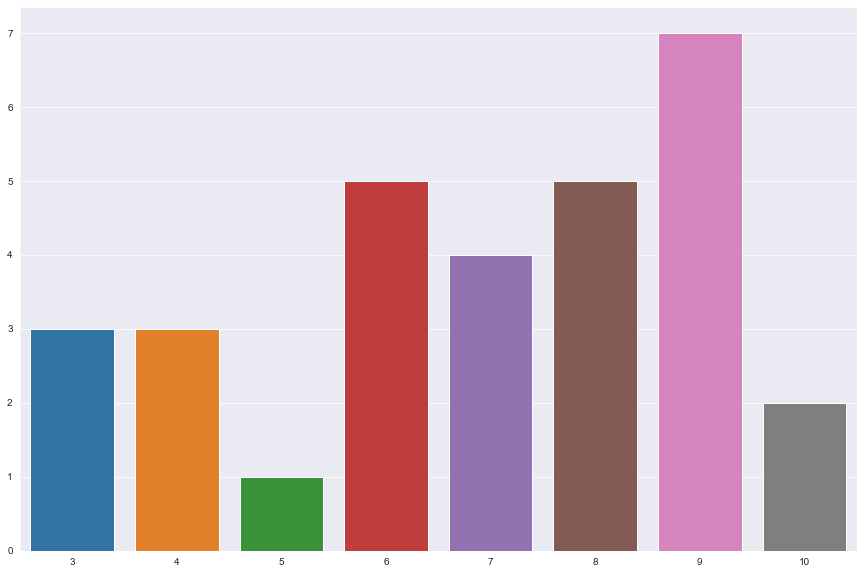

In [14]:
# add up the frequency of each unique value
unique, counts = np.unique(x, return_counts=True)

# # plots the results
sns.barplot(x = unique, y = counts);

This doesn't reallty work as I want the average to be around 5/6 and there certainly aren't going to be that many sessions with 9 people. I need to find a normal distribution with a mean around 5. And with integers! And with no values below 3! The following is adapted from https://www.py4u.net/discuss/18951 and https://stackoverflow.com/questions/55806118/remove-elements-from-numpy-array-smaller-than-1.

The total number of attendances at sessions in January is 152


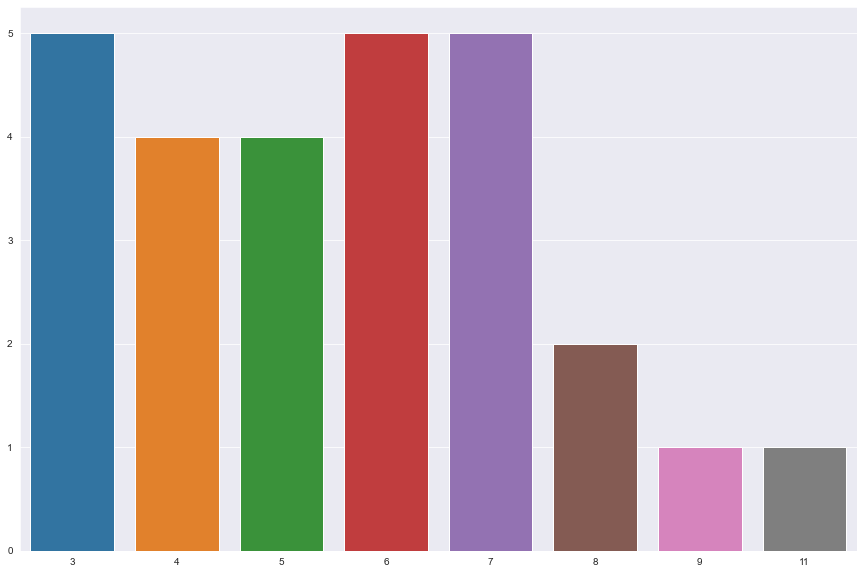

In [15]:
# sets mean, standard deviation and size of array
muso = rng.normal(loc=5, scale=3, size=30)

# rounds the values
musoInt = np.round(muso)

# removes values lower than 3
musoInt1 = musoInt[(musoInt > 2)]

# convert to integers
musoInt1 = musoInt1.astype(int)
# print(musoInt1)

# add up the frequency of each unique value
unique, counts = np.unique(musoInt1, return_counts=True)

# # plots the results
sns.barplot(x = unique, y = counts)

# adds up the results and converts to an int
y = int(musoInt1.sum())

print(f'The total number of attendances at sessions in January is {y}')

This looks like a lot better representation of what the breakdown of attendences might be. We now need to turn the total into the first column of the dataframe. We create an array using `numpy` with the total as the upper limit. This is then converted into a `pandas` dataframe and the first column titled muso.

In [16]:
# create numPy array using x as upper limit
data = np.arange(y)

# turn it into a dataframe
df = pd.DataFrame(data, columns = ['muso'])

# have a look
df.head()

,muso
0,0
1,1
2,2
3,3
4,4


<br>

2. **The instruments**  

We need to create a list of the instuments first - datatype is obviously going to be a string. We then use `numpy.random.choice` to create another array the same size (`y`) as the first column 'muso'. I weighted the percentage chance of returning each instrument (`p=[0.15, etc]`) so that guitar will be the most likely instrument to returned followed by fiddle and accordion. This variable doesn't need to be related to anything yet so we assign the instruments randomly as a new column. 

In [17]:
# create a list of instruments
instrs = ['guitar', 'fiddle', 'accordion', 'flute', 'uilleann_pipes', 'concertina', 'bodhrán',
        'mandolin', 'bass', 'banjo', 'drums', 'keyboard']

# we can pass in the probability for each item
instrs = rng.choice(instrs, p=[0.3, 0.25, 0.15, 0.04, 0.03, 0.01, 0.025, 0.05, 
                               0.05, 0.045, 0.03, 0.02], size=y)

# adds this list as a column to the dataframe
df['instrument'] = instrs.tolist()

# have a look
df.head()

,muso,instrument
0,0,guitar
1,1,accordion
2,2,guitar
3,3,guitar
4,4,guitar


In [18]:
# prints out some info so far
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   muso        152 non-null    int64 
 1   instrument  152 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


I'm now going to set muso to be the index.

In [19]:
# set index
df.set_index("muso", inplace = True)

# have a look
df.head()

,instrument
muso,
0,guitar
1,accordion
2,guitar
3,guitar
4,guitar


<br>

3. **The genre**  

This is where things get a little more interesting! There are 4 main genres represented in the sessions - ITM, bluegrass, old-time American, and blues. The ITM sessions are 4 nights a week while the other genres have 1 night each. Some instruments are played at all sessions (guitar), while some are particular to a genre (accordion and ITM).

After a lot of research and experimentation I came up with the following solution!  
Matching the genre to instrument for some instruments was easy in that all the accordions and uilleann pipers played in the ITM sessions. The following code sorts that:
```
df.loc[df['instrument'] == 'accordion', 'genre'] = 'ITM'  
```
The guitar and the fiddle were a bit more tricky in that they played in sessions of different genres.  I first of all saved the count for each instrument that played in multiple genres. I used the `pandas.count` method and converted the result to integer using `astype(int)`

In [20]:
# isolate guitar in 'instrument column'
noGuitars = df[df['instrument']=='guitar']

# count and convert to int
noGuitars = noGuitars.count().astype(int)

noFiddles = df[df['instrument']=='fiddle']
noFiddles = noFiddles.count().astype(int)

noBanjos = df[df['instrument']=='banjo']
noBanjos = noBanjos.count().astype(int)

noMandolins = df[df['instrument']=='mandolin']
noMandolins = noMandolins.count().astype(int)

noBasses = df[df['instrument']=='bass']
noBasses = noBasses.count().astype(int)

I then needed to create variables of lists for each genre based on a particular instrument the number of each instrument, i,e, mandolin only plays bluegrass and old-time.

In [21]:
# guitar
genre1 = ['bluegrass', 'ITM', 'old-time', 'blues']

# bass
genre2 = ['bluegrass', 'old-time', 'blues']

# banjo
genre3 = ['bluegrass', 'ITM', 'old-time']

# mandolin
genre4 = ['bluegrass', 'old-time']

# fiddle
genre5 = ['ITM', 'bluegrass', 'old-time']

This is where I spent the most time!!! I used `random.choices` and `pandas.Series` to create arrays for each of the problematic instruments. I weighted the output to reflect what I though was appropriate and I had to specify the length of the array. I couldn't give a simple integer here (as the number will change if the code is run again without a seed), so I had to convert the `noGuitars` variable to an integer. This `pandas` series is then converted to a numpy array ready to be added to the dataframe.

In [22]:
# create a random pandas series for guitar
guitar = pd.Series(random.choices(genre1, weights=[1, 1, 1, 2], k=int(noGuitars)))
# converts to numpy array
guitar1 = guitar.to_numpy()

bass = pd.Series(random.choices(genre2, weights=[1, 1, 1], k=int(noBasses)))
bass1 = bass.to_numpy()

banjo = pd.Series(random.choices(genre3, weights=[2, 1, 2], k=int(noBanjos)))
banjo1 = banjo.to_numpy()

mandolin = pd.Series(random.choices(genre4, weights=[1, 1], k=int(noMandolins)))
mandolin1 = mandolin.to_numpy()

fiddle = pd.Series(random.choices(genre5, weights=[2, 1, 1], k=int(noFiddles)))
fiddle1 = fiddle.to_numpy()

The following code creates a new column entitled 'genre' and specifies what genre each muso plays based on their instrument.

In [23]:
# where instrument equals accordion, genre equals ITM, etc
df.loc[df['instrument'] == 'accordion', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'concertina', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'guitar', 'genre'] = guitar1
df.loc[df['instrument'] == 'bass', 'genre'] = bass1  
df.loc[df['instrument'] == 'mandolin', 'genre'] = mandolin1  
df.loc[df['instrument'] == 'banjo', 'genre'] = banjo1
df.loc[df['instrument'] == 'uilleann_pipes', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'flute', 'genre'] = 'ITM'  
df.loc[df['instrument'] == 'bodhrán', 'genre'] = 'ITM'
df.loc[df['instrument'] == 'keyboard', 'genre'] = 'blues'
df.loc[df['instrument'] == 'drums', 'genre'] = 'blues'
df.loc[df['instrument'] == 'fiddle', 'genre'] = fiddle1

# have a look
df.head(20)

,instrument,genre
muso,,
0,guitar,blues
1,accordion,ITM
2,guitar,old-time
3,guitar,ITM
4,guitar,blues
5,bodhrán,ITM
6,accordion,ITM
7,flute,ITM
8,bodhrán,ITM


Seems fine!

<br>

4. **Ability**   

We're going to go with a binary approach here - intermediate or advanced as in reality there are no beginners at these sessions. Ability isn't dependent on anything else - there are good and bad in all genres and each genre is performed to a similar level.  
We're using a similar method to above with `random.choice` and `pandas.Series`. We're assuming that half of the musicians are 'decent' and the other half are 'legends'!

In [24]:
ability = pd.Series(random.choices(['decent','legend'], weights=[1, 1], k=len(df)))

In [25]:
# add new column to table
df['ability'] = ability.tolist()

# have a look
df.head(20)

,instrument,genre,ability
muso,,,
0,guitar,blues,decent
1,accordion,ITM,legend
2,guitar,old-time,decent
3,guitar,ITM,decent
4,guitar,blues,legend
5,bodhrán,ITM,legend
6,accordion,ITM,decent
7,flute,ITM,legend
8,bodhrán,ITM,decent


<br>

5. **Age**  

We're going to have 3 age-groups - whizz kids, grown-ups, and old-heads. The breakdown is going to be skewed towards the outer 2 ranges. Data type will be string.

In [26]:
# create the age_group variable
age_group = ['whizz_kid', 'grown-up', 'old-head']

In [27]:
# create new list
age_group = rng.choice(age_group, p=[0.4, 0.2, 0.4], size=y)

In [28]:
# add new column to dataframe
df['age_group'] = age_group.tolist()

# have a look
df

,instrument,genre,ability,age_group
muso,,,,
0,guitar,blues,decent,whizz_kid
1,accordion,ITM,legend,old-head
2,guitar,old-time,decent,old-head
3,guitar,ITM,decent,grown-up
4,guitar,blues,legend,whizz_kid
...,...,...,...,...
147,guitar,bluegrass,legend,old-head
148,guitar,blues,decent,whizz_kid
149,accordion,ITM,decent,grown-up


<br>

6. **Paid**  

There are at least 3 musicians getting paid each night, one of whom is always a guitar player. There are 30 sessions and 152 musicians, so I need to pick 90 at random to get paid of which 30 need to be guitar players! There are only going to be 30 paid guitar players in total as there wouldn't be two guitarists getting paid on the same night, so I'll extract a random sample of 30 of guitar players. For the remaining 60 I'm going to choose the better ability musicians. Age isn't really a factor.  

First we check how many guitarists we have in total:

In [29]:
# how many guitar players
df[df['instrument']=='guitar'].count()

instrument    50
genre         50
ability       50
age_group     50
dtype: int64

We need to choose 30 of those to get paid. we use `.sample()` method for this and create a new dataframe with the result.

In [30]:
# choose 30 guitarists and save in a new dataframe
df1 = df[df['instrument']=='guitar'].sample(n = 30)

# create new column with paid guitarists
df1['paid'] = 'yes'

We need to choose around 60 non-guitarists to get paid. We have a preference for legends and old-heads.

In [31]:
# create a new dataframe with just the non-guitarists
df2 = df[df['instrument']!='guitar']

# filter to leave only legends and old-heads
df2 = df2[(df2['ability']=='legend') | (df2['age_group']=='old-head')]

# have a look at the overview
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 1 to 146
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instrument  65 non-null     object
 1   genre       65 non-null     object
 2   ability     65 non-null     object
 3   age_group   65 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB


Looks like we have enough to make this work so we label all of these musicians as 'paid'.

In [32]:
# create a new column with paid and fill with 'yes'
df2['paid'] = 'yes'

In [33]:
# fill in the paid column with Nan values
df['paid'] = np.nan

In [34]:
# combine the 3 dataframes
dfNew = pd.concat([df, df1, df2], axis=0)

In [35]:
# sort the dataframe
df = dfNew.sort_values(by=['muso', 'paid'])

In [36]:
# drop duplicated rows
df = df[~df.index.duplicated(keep='first')]

In [37]:
# fill in Nan values with 'no'
df = df.fillna('no')

In [52]:
# have a look at quantities of paid and non-paid
df['paid'].value_counts()

yes    95
no     57
Name: paid, dtype: int64

In [39]:
# have a look
df.head()

,instrument,genre,ability,age_group,paid
muso,,,,,
0,guitar,blues,decent,whizz_kid,no
1,accordion,ITM,legend,old-head,yes
2,guitar,old-time,decent,old-head,yes
3,guitar,ITM,decent,grown-up,yes
4,guitar,blues,legend,whizz_kid,no
5,bodhrán,ITM,legend,whizz_kid,yes
6,accordion,ITM,decent,whizz_kid,no
7,flute,ITM,legend,whizz_kid,yes
8,bodhrán,ITM,decent,old-head,yes


In [38]:
# save to csv
df.to_csv('test1.csv')

<br>

7. **Gender**  

Unfortunately the gender is way off the charts in this place! Maybe 20% women max! I can use the same code as for ability above and just skew it towards men. I'll also include 'other' - according to https://en.wikipedia.org/wiki/Intersex#Population_figures this makes up 0.02% to 0.05% of the world's population.

In [40]:
# create a list of genders
genders = ['male', 'female', 'other']

# choose a random list of genders
gender = rng.choice(genders, y, p=[0.76, 0.2, 0.04])

# create new gender column
df['gender'] = gender.tolist()

# have a look
df.head()

8. **Drink**  

This is just a bit of fun and uses sweeping generalisations!
Possibilities are:
- Old musicians drink red wine and beamish
- Trad musicians favour guinness.
- Younger musicians drink craft beer and non-alcoholic alternatives.
- Women prefer.... Dangerous territory!
- Blues musicians drink budweiser
- Mid-aged musicians might be evenly split between all of the drinks!
- Paid musicians drink alcohol because it's generally free!

I'm going to choose 5 groups and then divide the rest up randomly
1. Older ITM musicians - Beamish
2. Bluegrass banjo players - red wine
3. Young blues musicians - craft beer
4. middle-aged legend ITM musos - Murphys

In [42]:
# isolate groups
# oldies
noOldies = df[df['age_group']=='old-head']

# old traddies
oldTraddies = noOldies[noOldies['genre']=='ITM']

bluegrass = df[df['genre']=='bluegrass']
blueBanjos = bluegrass[bluegrass['instrument']=='banjo']

noYoungies = df[df['age_group']=='whizz_kid']
youngBlues = noYoungies[noYoungies['genre']=='blues']
                        
middlies = df[df['age_group']=='grown-up']
middleLegend = middlies[middlies['ability']=='legend']
middleITMLegend = middleLegend[middleLegend['genre']=='ITM']                

In [44]:
# create a list of drinks
drinks = ['beamish', 'guinness', 'murphys', 'other_draft', 'craft_beers', 'red_wine', 'spirits', 
          'cider', 'non-alco']

In [45]:
# where age_group equals old-head, genre equals ITM, etc
df.loc[(df['age_group'] == 'old-head') & (df['genre'] == 'ITM'), 'drink_of_choice'] = 'beamish' 
df.loc[(df['genre'] == 'bluegrass') & (df['instrument'] == 'banjo'), 'drink_of_choice'] = 'red_wine' 
df.loc[(df['age_group'] == 'whizz_kid') & (df['genre'] == 'blues'), 'drink_of_choice'] = 'craft_beer' 
df.loc[(df['age_group'] == 'grown-up') & (df['genre'] == 'ITM')
       & (df['ability'] == 'legend'), 'drink_of_choice'] = 'murphys' 
df.loc[(df['age_group'] == 'whizz_kid') & (df['genre'] == 'ITM') & (df['gender'] == 'male')
       , 'drink_of_choice'] = 'guinness' 

# have a look
df.head(20)

,instrument,genre,ability,age_group,paid,gender,drink_of_choice
muso,,,,,,,
0,guitar,blues,decent,whizz_kid,no,male,craft_beer
1,accordion,ITM,legend,old-head,yes,male,beamish
2,guitar,old-time,decent,old-head,yes,male,NaN
3,guitar,ITM,decent,grown-up,yes,male,NaN
4,guitar,blues,legend,whizz_kid,no,male,craft_beer
5,bodhrán,ITM,legend,whizz_kid,yes,female,NaN
6,accordion,ITM,decent,whizz_kid,no,female,NaN
7,flute,ITM,legend,whizz_kid,yes,male,guinness
8,bodhrán,ITM,decent,old-head,yes,male,beamish


We need now to fill in the `NaN` values. I'm going to do this with a random selection from the `drinks` list.

In [46]:
# fill the NaN values with a random choice from the drinks list
df['drink_of_choice'] = df['drink_of_choice'].fillna(pd.Series(np.random.choice(drinks, size=len(df.index))))

df

,instrument,genre,ability,age_group,paid,gender,drink_of_choice
muso,,,,,,,
0,guitar,blues,decent,whizz_kid,no,male,craft_beer
1,accordion,ITM,legend,old-head,yes,male,beamish
2,guitar,old-time,decent,old-head,yes,male,other_draft
3,guitar,ITM,decent,grown-up,yes,male,beamish
4,guitar,blues,legend,whizz_kid,no,male,craft_beer
...,...,...,...,...,...,...,...
147,guitar,bluegrass,legend,old-head,yes,male,beamish
148,guitar,blues,decent,whizz_kid,no,male,craft_beer
149,accordion,ITM,decent,grown-up,no,male,red_wine


In [47]:
df['drink_of_choice'].value_counts()

beamish        39
guinness       33
craft_beers    12
cider          12
craft_beer     11
other_draft    11
spirits        10
murphys        10
non-alco        8
red_wine        6
Name: drink_of_choice, dtype: int64

In [48]:
df.to_csv('data/the_session_final.csv')

In [49]:
# drinks = rng.choice(drinks, size=x)

In [50]:
# # save to csv
# df.to_csv('data/the_session.csv')

In [51]:
# df['drinks'] = drinks.tolist()
# # df

<br>

---

## References

https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

https://www.statology.org/add-numpy-array-to-pandas-dataframe/

https://www.py4u.net/discuss/18951

https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/

http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot

https://stackoverflow.com/questions/10741346/numpy-most-efficient-frequency-counts-for-unique-values-in-an-array

https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

https://stackoverflow.com/questions/65982695/insert-a-new-column-in-pandas-with-random-string-values

https://pandas.pydata.org/pandas-docs/version/0.24.0rc1/api/generated/pandas.Series.to_numpy.html

https://www.w3schools.com/python/ref_random_choices.asp

https://www.kite.com/python/answers/how-to-convert-a-list-into-a-pandas-dataframe-in-python

https://stackoverflow.com/questions/65762166/np-where-with-strings-and-multiple-conditions-to-create-a-new-column-in-excel

https://datatofish.com/if-condition-in-pandas-dataframe/

https://stackoverflow.com/questions/306400/how-can-i-randomly-select-an-item-from-a-list

<br>

---
# END